In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive/My Drive/DATASET

/content/gdrive/My Drive/DATASET


In [ ]:
!ls

74.jpg	77.jpg	78.jpg	88.jpg	best_model.h5  CobaBatik2.ipynb  content  data_klasifikasi_batik


In [ ]:
#eksplor data
import os
for dirpath, dirnames, filenames in os.walk("data_klasifikasi_batik"):
  print(f"Ada{len(dirnames)}direktori dan {len(filenames)}gambar di dalam {dirpath}")

Ada2direktori dan 0gambar di dalam data_klasifikasi_batik
Ada15direktori dan 0gambar di dalam data_klasifikasi_batik/TEST
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Tambal
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Poleng
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Parang
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Sekar Jagad
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Pala
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Dayak
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Betawi
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Geblek Renteng
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Kawung
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Insang
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Cendrawasih
Ada0direktori da

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Ukuran Gambar:{img.shape}")
  return img


Ukuran Gambar:(224, 224, 3)


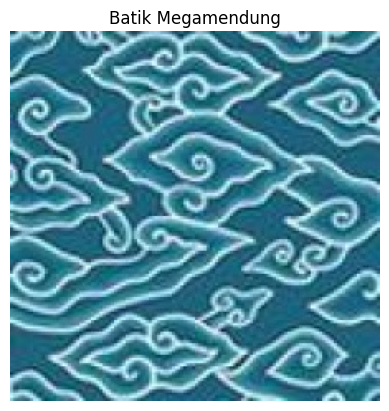

In [ ]:
img = view_random_image("data_klasifikasi_batik/TRAIN/", "Batik Megamendung")

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [ ]:
tf.random.set_seed(46)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.7, 1.0],
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dir = "data_klasifikasi_batik/TRAIN/"
test_dir = "data_klasifikasi_batik/TEST/"

In [ ]:
train_data_augmented = train_datagen.flow_from_directory(
    train_dir,
    batch_size=16,
    target_size=(224, 224),
    class_mode="categorical",
    shuffle=True
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,
    batch_size=16,
    target_size=(224, 224),
    class_mode="categorical",
    shuffle=False
)


Found 1050 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


In [ ]:
# Build the model using a pre-trained MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Unfreeze more layers in the base model
base_model.trainable = True
for layer in base_model.layers[:-100]:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    Dropout(0.5),
    Dense(15, activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#Callbacks
checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1
)

In [ ]:
# Train the model
history = model.fit(
    train_data_augmented,
    epochs=50,
    validation_data=valid_data,
    callbacks=[checkpoint, early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 3.9832 - accuracy: 0.1019

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 407s 6s/step - loss: 3.9832 - accuracy: 0.1019 - val_loss: 3.1381 - val_accuracy: 0.2267 - lr: 1.0000e-04
Epoch 2/50
66/66 [==============================] - 135s 2s/step - loss: 3.2251 - accuracy: 0.1476 - val_loss: 2.9436 - val_accuracy: 0.2500 - lr: 1.0000e-04
Epoch 3/50
66/66 [==============================] - 130s 2s/step - loss: 3.1107 - accuracy: 0.1886 - val_loss: 2.8431 - val_accuracy: 0.2800 - lr: 1.0000e-04
Epoch 4/50
66/66 [==============================] - 141s 2s/step - loss: 2.9393 - accuracy: 0.2362 - val_loss: 2.6525 - val_accuracy: 0.3733 - lr: 1.0000e-04
Epoch 5/50
66/66 [==============================] - 127s 2s/step - loss: 2.7897 - accuracy: 0.2876 - val_loss: 2.6059 - val_accuracy: 0.3700 - lr: 1.0000e-04
Epoch 6/50
66/66 [==============================] - 147s 2s/step - loss: 2.7095 - accuracy: 0.3238 - val_loss: 2.4593 - val_accuracy: 0.4300 - lr: 1.0000e-04
Epoch 7/50
66/66 [==============================] - 132s 2s/ste

In [ ]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot
  plt.plot(epochs, loss, label ='training_loss')
  plt.plot(epochs, val_loss, label ='val_loss')
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label ='training_acc')
  plt.plot(epochs, val_accuracy, label ='val_acc')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

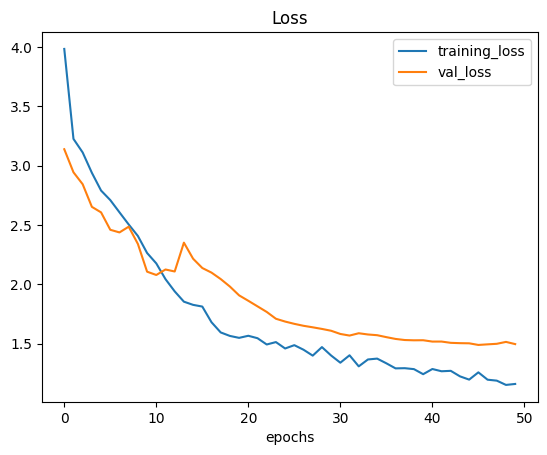

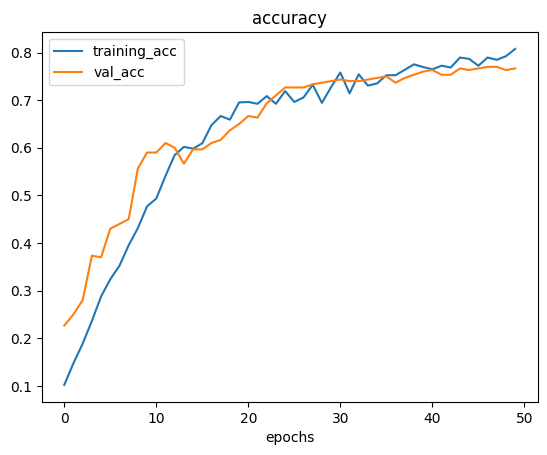

In [ ]:
plot_loss_curves(history)

In [ ]:
import os
from google.colab import files
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi untuk mengunggah dan memproses gambar
def process_image_and_predict(model, threshold=0.7):
    # Meminta pengguna untuk mengunggah gambar
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Menyimpan gambar yang diunggah
        path = fn  # File disimpan di direktori saat ini
        img = image.load_img(path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array / 255.0  # Normalisasi

        # Melakukan prediksi dengan model
        result = model.predict(img_array)

        # Mengeluarkan hasil prediksi
        predicted_class = np.argmax(result)
        predicted_prob = np.max(result)
        class_labels = list(train_data_augmented.class_indices.keys())  # Mengambil label kelas dari data training

        if predicted_prob < threshold:
            print("Maaf, gambar yang kamu masukkan belum ada di database kami.")
        else:
            predicted_label = class_labels[predicted_class]
            print(f"Predicted class: {predicted_class} ({predicted_label}) with probability {predicted_prob:.2f}")

        # Menampilkan gambar yang diunggah
        display_image(path)

# Fungsi untuk menampilkan gambar yang diunggah
def display_image(path):
    img = Image.open(path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Saving no_brand_butimo_kain_batik_tulis_asli_motif_kawung_-t-h08-_full01_eaeh116.jpg to no_brand_butimo_kain_batik_tulis_asli_motif_kawung_-t-h08-_full01_eaeh116 (1).jpg
1/1 [==============================] - 0s 92ms/step
Predicted class: 7 (Batik Kawung) with probability 1.00


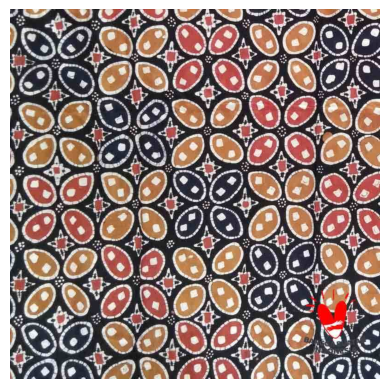

In [ ]:
# Memanggil fungsi untuk memproses gambar dan melakukan prediksi
process_image_and_predict(model)